### Import all the necessary modules for data analysis

In [1]:
 # Install the following modules
!pip install pandas_datareader

Defaulting to user installation because normal site-packages is not writeable


In [2]:
# Install the openpyxl package to handle excel files properly
!pip install openpyxl

Defaulting to user installation because normal site-packages is not writeable


In [3]:
import warnings
warnings.simplefilter("ignore")

In [4]:
from IPython import get_ipython
get_ipython().magic('reset -sf')

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [6]:
# Setting display option to 3 decimal places
pd.set_option('float_format', '{:.3f}'.format)

### Import Songs csv file for analysis

In [7]:
%pwd


'C:\\Users\\Q No-804\\Desktop\\Dataset'

In [8]:
import pandas as pd
filename = ('Songs_Data.csv')
try:
     df = pd.read_csv(filename)
except FileNotFoundError:
    print("File Doesn't Exist")
else:
    print(f"The {filename} File was read successfully")
        

The Songs_Data.csv File was read successfully


In [9]:
# Confirming if the dataframe is empty
df.empty

False

In [10]:
# Checking the first 10 records of the dataframe
df.head(10)

,song_id,title,artist,album,year_released,duration,tempo,loudness
0,1,8:00,Intars Busulis,Kino,0,208.169,140.029,-3.698
1,2,9:02,Aftermath,Tides of Sorrow,0,376.894,87.006,-4.605
2,3,100%,Cocoa Tea,Kingston Hot,1992,228.963,115.862,-11.627
3,4,3,Britney Spears,3,2009,465.475,131.999,-6.278
4,5,3,DJ X-Change,The X-Files 5.0,0,244.088,136.993,-6.072
5,6,40,U2,Live From Paris,1992,406.857,146.826,-8.539
6,7,124,Photek,Modus Operandi,1997,421.198,161.772,-10.611
7,8,1492,Scarlet's Remains,Scarlet's Remains,2005,215.902,170.702,-8.039
8,9,1969,Iggy And The Stooges,Telluric Chaos,1969,220.786,231.089,-8.943
9,10,1987,2 Minutos,Postal '97,1997,64.391,186.495,-7.653


In [11]:
# Checking how many records and columns we imported
df.shape

(10000, 8)

In [12]:
# Listing all the column headers of our dataframe
df.columns

Index(['song_id', 'title', 'artist', 'album', 'year_released', 'duration',
       'tempo', 'loudness'],
      dtype='object')

In [13]:
# Use the info() function to check the data structure of your dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   song_id        10000 non-null  int64  
 1   title          9999 non-null   object 
 2   artist         10000 non-null  object 
 3   album          10000 non-null  object 
 4   year_released  10000 non-null  int64  
 5   duration       10000 non-null  float64
 6   tempo          10000 non-null  float64
 7   loudness       10000 non-null  float64
dtypes: float64(3), int64(2), object(3)
memory usage: 625.1+ KB


In [14]:
# [int8: -128 to 127]; [unint8: 0 to 255]; [int16: -32,768 to 32,767]; [uint16: 0 to 65,537]
# [int32: -2,147,483,648 to-2,147,483,647]; [unint32: 0 to 4,294,967,296]; 
# [int64: -9,223,372,036,854,776 to -9,223,372,036,854,775]; [uint64: 0 to 18,446,744,073,709,551,616]
# [float8, float16, float32, float32, float64] follows similar pattern but no unsigned float [unfloat]

In [15]:
#Converting all the columns into the appropriate datatype
int_columns = ['song_id','year_released'] 
for column in int_columns:
    df[column] = df[column].astype('int16')

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   song_id        10000 non-null  int16  
 1   title          9999 non-null   object 
 2   artist         10000 non-null  object 
 3   album          10000 non-null  object 
 4   year_released  10000 non-null  int16  
 5   duration       10000 non-null  float64
 6   tempo          10000 non-null  float64
 7   loudness       10000 non-null  float64
dtypes: float64(3), int16(2), object(3)
memory usage: 507.9+ KB


In [16]:
#Converting all the columns into the appropriate datatype
float_columns = ['duration','tempo', 'loudness'] 
for column in float_columns:
    df[column] = df[column].astype('float32')

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   song_id        10000 non-null  int16  
 1   title          9999 non-null   object 
 2   artist         10000 non-null  object 
 3   album          10000 non-null  object 
 4   year_released  10000 non-null  int16  
 5   duration       10000 non-null  float32
 6   tempo          10000 non-null  float32
 7   loudness       10000 non-null  float32
dtypes: float32(3), int16(2), object(3)
memory usage: 390.8+ KB


In [17]:
#Converting all the columns into the appropriate datatype
string_columns = ['title', 'artist', 'album'] 
for column in string_columns:
    df[column] = df[column].astype('string')

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   song_id        10000 non-null  int16  
 1   title          9999 non-null   string 
 2   artist         10000 non-null  string 
 3   album          10000 non-null  string 
 4   year_released  10000 non-null  int16  
 5   duration       10000 non-null  float32
 6   tempo          10000 non-null  float32
 7   loudness       10000 non-null  float32
dtypes: float32(3), int16(2), string(3)
memory usage: 390.8 KB


In [18]:
# Songs with year of release equal to zero are erroneous, using pandas inbuilt function, 
# how many songs have  incorrect year of release?
df[df['year_released']== 0]


,song_id,title,artist,album,year_released,duration,tempo,loudness
0,1,8:00,Intars Busulis,Kino,0,208.169,140.029,-3.698
1,2,9:02,Aftermath,Tides of Sorrow,0,376.894,87.006,-4.605
4,5,3,DJ X-Change,The X-Files 5.0,0,244.088,136.993,-6.072
10,11,4/20/2002,Pearl Jam,Lost Dogs,0,232.359,138.291,-12.246
11,12,6 6 2006,Ziggy Marley And The Melody Makers,Hey World,0,335.908,145.222,-15.889
...,...,...,...,...,...,...,...,...
9993,9994,Zoned Out,DJ X-Change,The X-Factor (Side B),0,188.786,102.662,-5.571
9995,9996,Zuo Li Bu An,Tanya Chua,Amphibian,0,254.249,147.892,-6.217
9996,9997,Zurezko Olerkia,Varios,Luis de Pablo - Zurezko olerkia (Poema de madera),0,168.280,100.929,-25.431
9997,9998,Zydeco In D-Minor,"Myrick ""Freeze"" Guillory",Nouveau Zydeco,0,300.826,137.663,-12.574


In [19]:
# Using the .loc function to count the data
incorrect_year = df.loc[df.year_released== 0,'year_released'].count()
print(f'The total number of records with zero years is: {incorrect_year}')

The total number of records with zero years is: 5320


In [20]:
# Using the normal filtering method

df['year_released'][df.year_released==0]

0       0
1       0
4       0
10      0
11      0
       ..
9993    0
9995    0
9996    0
9997    0
9999    0
Name: year_released, Length: 5320, dtype: int16

In [21]:
# Using the normal filtering method
incorrect_year = df['year_released'][df.year_released==0].count()
print(f'The total number of records with zero years is: {incorrect_year}')

The total number of records with zero years is: 5320


In [22]:
# The loudness of a song must be less than zero. The closer the value is to zero, 
# the louder the song. How many songs have loudness greater than  or equal to zero?

# Using the normal filtering method

df['loudness'][df.loudness>=0]


12     0.000
1471   0.566
Name: loudness, dtype: float32

In [23]:
# Using the normal filtering method
incorrect_loudness = df['loudness'][df.loudness>=0].count()
print(f'The total number of records with incorrect tempo is: {incorrect_loudness}')

The total number of records with incorrect tempo is: 2


In [24]:
# The tempo of a song cannot be zero, How many songs have a tempo of zero?
# Using the normal filtering method

df['tempo'][df.tempo<=0]


276    0.000
397    0.000
508    0.000
901    0.000
979    0.000
1321   0.000
1443   0.000
1631   0.000
2948   0.000
4555   0.000
4652   0.000
4924   0.000
5664   0.000
5977   0.000
6133   0.000
7505   0.000
7603   0.000
7681   0.000
7688   0.000
7907   0.000
8254   0.000
8809   0.000
9493   0.000
9586   0.000
9898   0.000
Name: tempo, dtype: float32

In [25]:
# Using the normal filtering method
incorrect_tempo = df['tempo'][df.tempo<=0].count()
print(f'The total number of records with incorrect tempo is: {incorrect_tempo}')

The total number of records with incorrect tempo is: 25


In [26]:
# Displaying all the incorrect data
incorrect_data_records = df[(df['year_released']==0) | 
                          (df['loudness']>=0) | 
                          (df['tempo']<=0)]

incorrect_data_records

,song_id,title,artist,album,year_released,duration,tempo,loudness
0,1,8:00,Intars Busulis,Kino,0,208.169,140.029,-3.698
1,2,9:02,Aftermath,Tides of Sorrow,0,376.894,87.006,-4.605
4,5,3,DJ X-Change,The X-Files 5.0,0,244.088,136.993,-6.072
10,11,4/20/2002,Pearl Jam,Lost Dogs,0,232.359,138.291,-12.246
11,12,6 6 2006,Ziggy Marley And The Melody Makers,Hey World,0,335.908,145.222,-15.889
...,...,...,...,...,...,...,...,...
9993,9994,Zoned Out,DJ X-Change,The X-Factor (Side B),0,188.786,102.662,-5.571
9995,9996,Zuo Li Bu An,Tanya Chua,Amphibian,0,254.249,147.892,-6.217
9996,9997,Zurezko Olerkia,Varios,Luis de Pablo - Zurezko olerkia (Poema de madera),0,168.280,100.929,-25.431
9997,9998,Zydeco In D-Minor,"Myrick ""Freeze"" Guillory",Nouveau Zydeco,0,300.826,137.663,-12.574


In [27]:
# Estimating the records that are invalid.
total_incorrect_data = incorrect_data_records['song_id'].count()
print(f'The total number of records with incorrect data is: {total_incorrect_data}')

The total number of records with incorrect data is: 5333


In [28]:
# Displaying all the Correct data
correct_data_records = df[(df['year_released']!=0) & 
                          (df['loudness']<0) & 
                          (df['tempo']>0)]

correct_data_records

,song_id,title,artist,album,year_released,duration,tempo,loudness
2,3,100%,Cocoa Tea,Kingston Hot,1992,228.963,115.862,-11.627
3,4,3,Britney Spears,3,2009,465.475,131.999,-6.278
5,6,40,U2,Live From Paris,1992,406.857,146.826,-8.539
6,7,124,Photek,Modus Operandi,1997,421.198,161.772,-10.611
7,8,1492,Scarlet's Remains,Scarlet's Remains,2005,215.902,170.702,-8.039
...,...,...,...,...,...,...,...,...
9986,9987,Zi You Zi Zai,Stephy Tang,Fantasy,2006,205.061,148.252,-9.151
9987,9988,Zig-Zag Walk,Foghat,Zig Zag Walk,1983,208.666,132.159,-7.792
9992,9993,Zolte Slonie,Kasia Stankiewicz,Mimikra,2006,304.065,134.051,-7.114
9994,9995,Zornig!,Dynamite Deluxe,Deluxe Soundsystem,2000,148.297,87.844,-8.315


In [29]:
# Estimating the records that are invalid.
total_incorrect_data = incorrect_data_records['song_id'].count()
print(f'The total number of records with incorrect data is: {total_incorrect_data}')

The total number of records with incorrect data is: 5333


In [30]:
# Confirming the validity of the records
# Displaying all the Correct data
correct_data_records = df[(df['year_released']!=0) & 
                          (df['loudness']<0) & 
                          (df['tempo']>0)]

correct_data_records
total_incorrect_data = incorrect_data_records['song_id']
Total_original_data = ['incorrect_data_records + correct_data_records ']
print(f'The total number of records with Total_original_data is: {Total_original_data}')
df.shape

The total number of records with Total_original_data is: ['incorrect_data_records + correct_data_records ']


(10000, 8)

In [31]:
# Exporting correct data dataframe as CSV File
try:
    correct_data_records.to_csv("Clean_song_data v1.csv")
except:
    print("Error: Unable to convert dataframe to a csv file")
else:
    print("The csv file successfully created.")

The csv file successfully created.


In [32]:
# Using the panda's drop function, delete all the songs with year = 0

df.drop(df[df['year_released'] == 0].index, inplace = True)

df

,song_id,title,artist,album,year_released,duration,tempo,loudness
2,3,100%,Cocoa Tea,Kingston Hot,1992,228.963,115.862,-11.627
3,4,3,Britney Spears,3,2009,465.475,131.999,-6.278
5,6,40,U2,Live From Paris,1992,406.857,146.826,-8.539
6,7,124,Photek,Modus Operandi,1997,421.198,161.772,-10.611
7,8,1492,Scarlet's Remains,Scarlet's Remains,2005,215.902,170.702,-8.039
...,...,...,...,...,...,...,...,...
9986,9987,Zi You Zi Zai,Stephy Tang,Fantasy,2006,205.061,148.252,-9.151
9987,9988,Zig-Zag Walk,Foghat,Zig Zag Walk,1983,208.666,132.159,-7.792
9992,9993,Zolte Slonie,Kasia Stankiewicz,Mimikra,2006,304.065,134.051,-7.114
9994,9995,Zornig!,Dynamite Deluxe,Deluxe Soundsystem,2000,148.297,87.844,-8.315


In [33]:
# Using the panda's drop function, delete all the songs with tempo = 0

df.drop(df[df['tempo'] <= 0].index, inplace = True)

df

,song_id,title,artist,album,year_released,duration,tempo,loudness
2,3,100%,Cocoa Tea,Kingston Hot,1992,228.963,115.862,-11.627
3,4,3,Britney Spears,3,2009,465.475,131.999,-6.278
5,6,40,U2,Live From Paris,1992,406.857,146.826,-8.539
6,7,124,Photek,Modus Operandi,1997,421.198,161.772,-10.611
7,8,1492,Scarlet's Remains,Scarlet's Remains,2005,215.902,170.702,-8.039
...,...,...,...,...,...,...,...,...
9986,9987,Zi You Zi Zai,Stephy Tang,Fantasy,2006,205.061,148.252,-9.151
9987,9988,Zig-Zag Walk,Foghat,Zig Zag Walk,1983,208.666,132.159,-7.792
9992,9993,Zolte Slonie,Kasia Stankiewicz,Mimikra,2006,304.065,134.051,-7.114
9994,9995,Zornig!,Dynamite Deluxe,Deluxe Soundsystem,2000,148.297,87.844,-8.315


In [34]:
# Using the panda's drop function, delete all the songs with loudness >= 0

df.drop(df[df['loudness'] >= 0].index, inplace = True)

df


,song_id,title,artist,album,year_released,duration,tempo,loudness
2,3,100%,Cocoa Tea,Kingston Hot,1992,228.963,115.862,-11.627
3,4,3,Britney Spears,3,2009,465.475,131.999,-6.278
5,6,40,U2,Live From Paris,1992,406.857,146.826,-8.539
6,7,124,Photek,Modus Operandi,1997,421.198,161.772,-10.611
7,8,1492,Scarlet's Remains,Scarlet's Remains,2005,215.902,170.702,-8.039
...,...,...,...,...,...,...,...,...
9986,9987,Zi You Zi Zai,Stephy Tang,Fantasy,2006,205.061,148.252,-9.151
9987,9988,Zig-Zag Walk,Foghat,Zig Zag Walk,1983,208.666,132.159,-7.792
9992,9993,Zolte Slonie,Kasia Stankiewicz,Mimikra,2006,304.065,134.051,-7.114
9994,9995,Zornig!,Dynamite Deluxe,Deluxe Soundsystem,2000,148.297,87.844,-8.315


In [35]:
# Exporting correct data dataframe as CSV File
try:
    df.to_csv("Clean_song_data v2.csv")
except:
    print("Error: Unable to convert dataframe to a csv file")
else:
    print("The version 2 csv file successfully created.")

The version 2 csv file successfully created.


In [36]:
#create a pivot table from dataframe by modifying the below code but using:
# index= 'year_released', values = loudness, aggfunc='mean'

pd.pivot_table(df,index='year_released',values='loudness',  aggfunc='mean') 

,loudness
year_released,
1926,-21.673
1927,-16.135
1929,-14.873
1930,-16.751
1934,-30.530
...,...
2006,-8.348
2007,-8.019
2008,-7.913


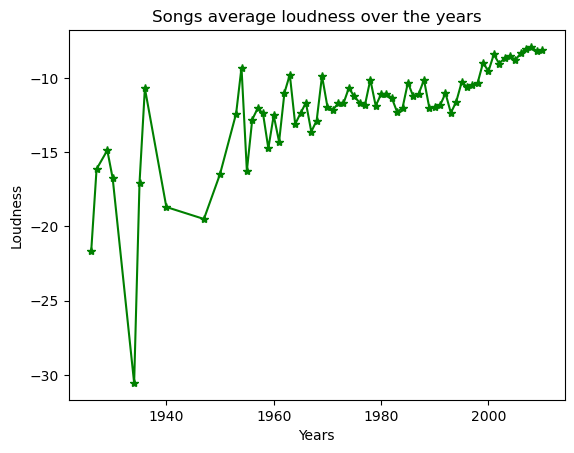

In [37]:
# Using matplotlib, draw a line graph of the year against the average loudness
pivot_table = pd.pivot_table(df,index='year_released',values='loudness',  aggfunc='mean') 
plt.plot(pivot_table['loudness'],color='green',marker='*',linestyle='-')
plt.xlabel('Years')
plt.ylabel('Loudness')
plt.title('Songs average loudness over the years')
plt.savefig('line_graph.tiff', format='tiff')
plt.show()

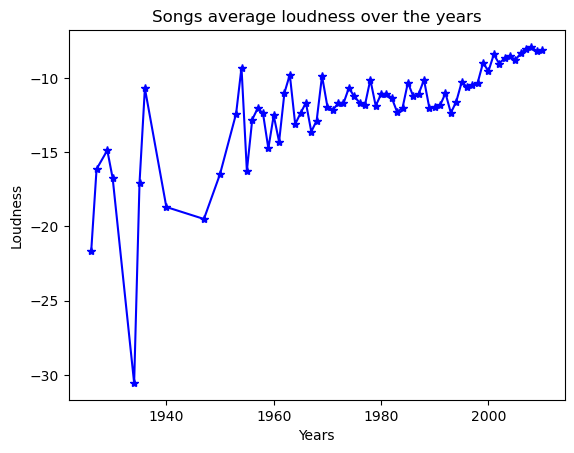

In [38]:
# Save the graph as a picture in your folder
plt.plot(pivot_table['loudness'],color='blue',marker='*',linestyle='-')
plt.xlabel('Years')
plt.ylabel('Loudness')
plt.title('Songs average loudness over the years')
plt.savefig('Songs_trend from 1926 to 2010.tiff')
plt.savefig('line_graph.tiff', format='tiff')
plt.show()

In [39]:
# df.to_excel('Clean songs.xlsx')

In [40]:
# Save the clean song dataframe as an excel file
try:
    df.to_excel('Clean songs.xlsx')
except Exception as error:
    print(f'{type(error)} detected: {error}')
    print()
else:
    print('File converted successfully')
finally:
    df.to_csv('Clean songs.csv')
    print('>> File finally saved as a csv <<')



<class 'openpyxl.utils.exceptions.IllegalCharacterError'> detected: 

>> File finally saved as a csv <<


In [41]:
# The link below contains the Wikipedia list of countries by electricity production
# https://en.wikipedia.org/wiki/List_of_countries_by_electricity_production

In [42]:
# (a) Use the numpy and pandas modules to read the production by source table 
#   and clean up the data
energy_df = pd.read_html("https://en.wikipedia.org/wiki/List_of_countries_by_electricity_production")[0]
energy_df.head(9)

Location Total (TWh) Generation (Terawatt-hours)                    \
        Location Total (TWh)                        Coal      Gas    Hydro   
0          World   28844.000                   10288.000 6582.000 4298.000   
1          China    8849.000                    5398.000  291.000 1303.000   
2  United States    4287.000                     832.000 1687.000  249.000   
3          India    1858.000                    1380.000   47.000  175.000   
4         Russia    1167.000                     192.000  534.000  198.000   
5          Japan    1034.000                     348.000  361.000   75.000   
6         Brazil     677.000                      16.000   42.000  427.000   
7         Canada     660.000                      35.000   84.000  398.000   
8    South Korea     620.000                     211.000  175.000    4.000   

                                                    
  Nuclear     Wind    Solar    Oil*    Bio.   Geo.  
0    2640 2099.000 1323.000 849.000 676.000 89.000  
1     418  763.000  428.000  72.000 177.000  0.000  
2     772  434.000  205.000  39.000  52.000 18.000  
3      46   70.000   95.000   4.000  41.000  0.000  
4     224    4.000    2.000  12.000   0.800  0.000  
5      52    8.000  102.000  46.000  41.000  0.000  
6      15   82.000   30.000  12.000  53.000  0.000  
7      87   38.000    6.000   3.000   9.000  0.000  
8     176    3.000   27.000   7.000  17.000  0.000

In [43]:
# (a) Use the numpy and pandas modules to read the production by source table 
#     and clean up the data

In [44]:
# Delete a level of a multilevel column name
energy_df.columns = energy_df.columns.droplevel()
energy_df.head(8)

,Location,Total (TWh),Coal,Gas,Hydro,Nuclear,Wind,Solar,Oil*,Bio.,Geo.
0,World,28844.000,10288.000,6582.000,4298.000,2640,2099.000,1323.000,849.000,676.000,89.000
1,China,8849.000,5398.000,291.000,1303.000,418,763.000,428.000,72.000,177.000,0.000
2,United States,4287.000,832.000,1687.000,249.000,772,434.000,205.000,39.000,52.000,18.000
3,India,1858.000,1380.000,47.000,175.000,46,70.000,95.000,4.000,41.000,0.000
4,Russia,1167.000,192.000,534.000,198.000,224,4.000,2.000,12.000,0.800,0.000
5,Japan,1034.000,348.000,361.000,75.000,52,8.000,102.000,46.000,41.000,0.000
6,Brazil,677.000,16.000,42.000,427.000,15,82.000,30.000,12.000,53.000,0.000
7,Canada,660.000,35.000,84.000,398.000,87,38.000,6.000,3.000,9.000,0.000


In [45]:
energy_df.columns

Index(['Location', 'Total (TWh)', 'Coal', 'Gas', 'Hydro', 'Nuclear', 'Wind',
       'Solar', 'Oil*', 'Bio.', 'Geo.'],
      dtype='object')

In [46]:
# Checking how many records and columns we imported
energy_df.shape

(210, 11)

In [47]:
# Use the info() function to check the data structure of your dataframe
energy_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 210 entries, 0 to 209
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Location     210 non-null    object 
 1   Total (TWh)  210 non-null    float64
 2   Coal         210 non-null    float64
 3   Gas          210 non-null    float64
 4   Hydro        210 non-null    float64
 5   Nuclear      210 non-null    int64  
 6   Wind         210 non-null    float64
 7   Solar        210 non-null    float64
 8   Oil*         210 non-null    float64
 9   Bio.         210 non-null    float64
 10  Geo.         210 non-null    float64
dtypes: float64(9), int64(1), object(1)
memory usage: 18.2+ KB


In [48]:
# Renaming the columns
energy_df =energy_df.rename(
    columns={'Total (TWh)':'Total_TWh',
             'Oil*':'Oil',
             'Bio.':'Bio',
             'Geo.':'Geo',
            })
energy_df.columns

Index(['Location', 'Total_TWh', 'Coal', 'Gas', 'Hydro', 'Nuclear', 'Wind',
       'Solar', 'Oil', 'Bio', 'Geo'],
      dtype='object')

In [49]:
new_energy_df = energy_df[['Location','Total_TWh', 'Coal', 'Gas', 'Hydro',
       'Nuclear', 'Wind','Solar', 'Oil', 'Bio','Geo']]
new_energy_df.head(10)

,Location,Total_TWh,Coal,Gas,Hydro,Nuclear,Wind,Solar,Oil,Bio,Geo
0,World,28844.000,10288.000,6582.000,4298.000,2640,2099.000,1323.000,849.000,676.000,89.000
1,China,8849.000,5398.000,291.000,1303.000,418,763.000,428.000,72.000,177.000,0.000
2,United States,4287.000,832.000,1687.000,249.000,772,434.000,205.000,39.000,52.000,18.000
3,India,1858.000,1380.000,47.000,175.000,46,70.000,95.000,4.000,41.000,0.000
4,Russia,1167.000,192.000,534.000,198.000,224,4.000,2.000,12.000,0.800,0.000
5,Japan,1034.000,348.000,361.000,75.000,52,8.000,102.000,46.000,41.000,0.000
6,Brazil,677.000,16.000,42.000,427.000,15,82.000,30.000,12.000,53.000,0.000
7,Canada,660.000,35.000,84.000,398.000,87,38.000,6.000,3.000,9.000,0.000
8,South Korea,620.000,211.000,175.000,4.000,176,3.000,27.000,7.000,17.000,0.000
9,Germany,567.000,180.000,80.000,18.000,35,125.000,61.000,22.000,48.000,0.200


In [50]:
new_energy_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 210 entries, 0 to 209
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Location   210 non-null    object 
 1   Total_TWh  210 non-null    float64
 2   Coal       210 non-null    float64
 3   Gas        210 non-null    float64
 4   Hydro      210 non-null    float64
 5   Nuclear    210 non-null    int64  
 6   Wind       210 non-null    float64
 7   Solar      210 non-null    float64
 8   Oil        210 non-null    float64
 9   Bio        210 non-null    float64
 10  Geo        210 non-null    float64
dtypes: float64(9), int64(1), object(1)
memory usage: 18.2+ KB


In [51]:
#Check for nulls
new_energy_df.isnull().any()

Location     False
Total_TWh    False
Coal         False
Gas          False
Hydro        False
Nuclear      False
Wind         False
Solar        False
Oil          False
Bio          False
Geo          False
dtype: bool

In [52]:
# Changing all columns to the appropriate data types
string_columns = ['Location']
for column in string_columns:
    new_energy_df[column] = new_energy_df[column].astype ("string")
    
float_columns = ['Total_TWh']
for column in float_columns:
    new_energy_df[column] = new_energy_df[column].astype ("float32")
    new_energy_df[column].round(decimals=2)
    
float_columns = ['Coal', 'Gas', 'Hydro','Nuclear', 'Wind',
                       'Solar', 'Oil','Bio','Geo']
for column in float_columns:
    new_energy_df[column] = new_energy_df[column].astype ("float16")
    

    

In [53]:
new_energy_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 210 entries, 0 to 209
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Location   210 non-null    string 
 1   Total_TWh  210 non-null    float32
 2   Coal       210 non-null    float16
 3   Gas        210 non-null    float16
 4   Hydro      210 non-null    float16
 5   Nuclear    210 non-null    float16
 6   Wind       210 non-null    float16
 7   Solar      210 non-null    float16
 8   Oil        210 non-null    float16
 9   Bio        210 non-null    float16
 10  Geo        210 non-null    float16
dtypes: float16(9), float32(1), string(1)
memory usage: 6.3 KB


In [54]:
# Extracting the columns
new_energy_df.columns

Index(['Location', 'Total_TWh', 'Coal', 'Gas', 'Hydro', 'Nuclear', 'Wind',
       'Solar', 'Oil', 'Bio', 'Geo'],
      dtype='object')

In [55]:
# Rounding 

In [56]:
# Removing the world Row
new_energy_df.drop(new_energy_df[new_energy_df['Location'] == 'World'].index, inplace = True)

In [57]:
# Listing top 10 countries with highest energy Production
big_energy_producer = new_energy_df.nlargest(n=10,columns=['Total_TWh'])

big_energy_producer

,Location,Total_TWh,Coal,Gas,Hydro,Nuclear,Wind,Solar,Oil,Bio,Geo
1,China,8849.000,5400.000,291.000,1303.000,418.000,763.000,428.000,72.000,177.000,0.000
2,United States,4287.000,832.000,1687.000,249.000,772.000,434.000,205.000,39.000,52.000,18.000
3,India,1858.000,1380.000,47.000,175.000,46.000,70.000,95.000,4.000,41.000,0.000
4,Russia,1167.000,192.000,534.000,198.000,224.000,4.000,2.000,12.000,0.800,0.000
5,Japan,1034.000,348.000,361.000,75.000,52.000,8.000,102.000,46.000,41.000,0.000
6,Brazil,677.000,16.000,42.000,427.000,15.000,82.000,30.000,12.000,53.000,0.000
7,Canada,660.000,35.000,84.000,398.000,87.000,38.000,6.000,3.000,9.000,0.000
8,South Korea,620.000,211.000,175.000,4.000,176.000,3.000,27.000,7.000,17.000,0.000
9,Germany,567.000,180.000,80.000,18.000,35.000,125.000,61.000,22.000,48.000,0.200
10,France,469.000,4.000,46.000,46.000,295.000,39.000,20.000,10.000,10.000,0.600


In [58]:
# Listing 10 countries with least energy Production
small_energy_producer = new_energy_df.nsmallest(n=10,columns=['Total_TWh'])

small_energy_producer

,Location,Total_TWh,Coal,Gas,Hydro,Nuclear,Wind,Solar,Oil,Bio,Geo
208,Montserrat,0.010,0.000,0.000,0.000,0.000,0.000,0.000,0.010,0.000,0.000
209,"Saint Helena, Ascension and Tristan da Cunha",0.010,0.000,0.000,0.000,0.000,0.000,0.000,0.010,0.000,0.000
207,Falkland Islands,0.020,0.000,0.000,0.000,0.000,0.010,0.000,0.010,0.000,0.000
206,Kiribati,0.030,0.000,0.000,0.000,0.000,0.000,0.000,0.030,0.000,0.000
204,Nauru,0.040,0.000,0.000,0.000,0.000,0.000,0.000,0.040,0.000,0.000
205,Cook Islands,0.040,0.000,0.000,0.000,0.000,0.000,0.020,0.020,0.000,0.000
203,Saint Pierre and Miquelon,0.050,0.000,0.000,0.000,0.000,0.000,0.000,0.050,0.000,0.000
202,Vanuatu,0.070,0.000,0.000,0.000,0.000,0.000,0.010,0.060,0.000,0.000
200,Guinea-Bissau,0.080,0.000,0.000,0.000,0.000,0.000,0.000,0.080,0.000,0.000
201,Tonga,0.080,0.000,0.000,0.000,0.000,0.000,0.010,0.070,0.000,0.000


In [59]:
# Save the clean dataframe as an excel file
try:
    new_energy_df.to_excel('World Energy Production by Country.xlsx')
except Exception as error:
    print(f'{type(error)} detected: {error}')
    print()
else:
    print('File converted to MS Excel successfully')
finally:
    new_energy_df.to_csv('World Energy Production by Country.csv')
    print('>> File Also saved as a csv <<')

File converted to MS Excel successfully
>> File Also saved as a csv <<


In [60]:
df=pd.read_csv('World Energy Production by Country.csv')

In [61]:
#create a pivot table from dataframe by modifying the below code but using:
# index= 'Location', values = 'Total_TWh', aggfunc='mean'

pd.pivot_table(df,index='Location',values='Total_TWh',  aggfunc='mean') 

,Total_TWh
Location,
Afghanistan,0.800
Albania,7.000
Algeria,88.000
American Samoa,0.200
Angola,17.000
...,...
Venezuela,85.000
Vietnam,260.000
Yemen,3.000


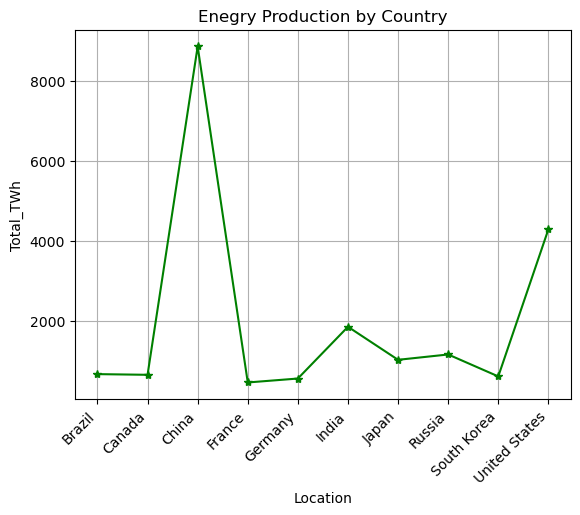

In [62]:
# Using matplotlib, draw a line graph of 10 highest Energy Production by Country.
pivot_table = pd.pivot_table(df.head(10),index='Location',values='Total_TWh',  aggfunc='mean') 
plt.plot(pivot_table['Total_TWh'],color='green',marker='*',linestyle='-')
plt.xlabel('Location')
plt.ylabel('Total_TWh')
plt.title('Enegry Production by Country')
plt.xticks(rotation=45,ha='right')
plt.grid(True)
plt.savefig('line_graph.tiff', format='tiff')
plt.show()

In [67]:
# Select a specific country from the dataset. eg.'Kenya'
desired_country ='Kenya'
country_data=df[df['Location'] == desired_country]
print(country_data)

     Unnamed: 0 Location  Total_TWh  Coal   Gas  Hydro  Nuclear  Wind  Solar  \
100         101    Kenya     12.000 0.000 0.000  3.000    0.000 2.000  0.400   

      Oil   Bio   Geo  
100 1.000 0.300 6.000  
